# Decision Tree & Random Forest

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])

# import warnings
# warnings.filterwarnings('ignore')

## Preprocessing and EDA

In [ ]:
df = pd.read_csv("datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
df.shape

(1470, 35)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

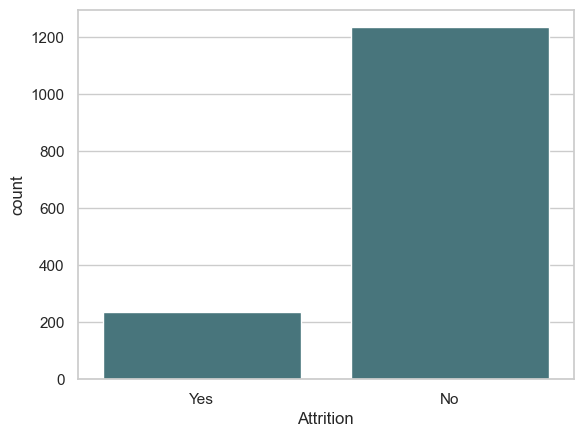

In [ ]:
sns.countplot(df, x='Attrition');

In [ ]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [ ]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 10:
        categorical_col.append(column)

In [ ]:
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
categorical_col.remove('Attrition')

In [ ]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

In [ ]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int8

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
df['BusinessTravel'].unique()

array([2, 1, 0])

## Splitting the dataset into Training/ Test set

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"---Train data Freq Distr:\n {y_train.value_counts()/len(y_train)}")
print(f"\n---Test data Freq Distr:\n {y_test.value_counts()/len(y_test)}")

---Train data Freq Distr:
 Attrition
0    0.838678
1    0.161322
Name: count, dtype: float64

---Test data Freq Distr:
 Attrition
0    0.839002
1    0.160998
Name: count, dtype: float64


## Custom function for Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X, y, split):
    pred = clf.predict(X)
    clf_report = pd.DataFrame(classification_report(y, pred, output_dict=True))
    print(f"{split} Result: (Accuracy Score: {accuracy_score(y, pred) * 100:.2f}%)");
    print("__________________________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("__________________________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y, pred)}\n")

## Decision Tree Classifier

#### Decision Tree parameters:

 - **criterion**: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
 - **splitter**: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.
 - **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
 - **min_samples_split**: The minimum number of samples required to split an internal node.
 - **min_samples_leaf**: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
 - **max_features**: The number of features to consider when looking for the best split.
 - **max_leaf_nodes**: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
 - **min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
print_score(tree_clf, X_train, y_train, 'Train')
print_score(tree_clf, X_test, y_test, 'Test')

Train Result: (Accuracy Score: 100.00%)
__________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
__________________________________________________________
Confusion Matrix: 
 [[863   0]
 [  0 166]]

Test Result: (Accuracy Score: 77.10%)
__________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.856764   0.265625  0.770975    0.561194      0.761592
recall       0.872973   0.239437  0.770975    0.556205      0.770975
f1-score     0.864793   0.251852  0.770975    0.558322      0.766110
support    370.000000  71.000000  0.770975  441.000000    441.000000
_______________

## Decision Tree Classifier - Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 11))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 11)),
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)

best_params = tree_cv.best_params_
print(f"\nBest paramters:\n{best_params}")

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits

Best paramters:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
tree_clf = DecisionTreeClassifier(**best_params);
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7, splitter='random')

In [ ]:
print_score(tree_clf, X_train, y_train, 'Train')
print_score(tree_clf, X_test, y_test, 'Test')

Train Result: (Accuracy Score: 86.78%)
__________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.880628    0.702703  0.867833     0.791665      0.851925
recall       0.974508    0.313253  0.867833     0.643880      0.867833
f1-score     0.925193    0.433333  0.867833     0.679263      0.845845
support    863.000000  166.000000  0.867833  1029.000000   1029.000000
__________________________________________________________
Confusion Matrix: 
 [[841  22]
 [114  52]]

Test Result: (Accuracy Score: 85.26%)
__________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.876543   0.583333  0.852608    0.729938      0.829337
recall       0.959459   0.295775  0.852608    0.627617      0.852608
f1-score     0.916129   0.392523  0.852608    0.654326      0.831830
support    370.000000  71

## Visualization

In [ ]:
# !pip install pydot
# !pip install graphviz
# !pip install pydotplus

In [ ]:
# from sklearn import tree
# tree.plot_tree(tree_clf)

In [ ]:
# plt.figure()
# tree.plot_tree(tree_clf, filled=True)
# plt.savefig('tree.eps', format='eps', bbox_inches="tight")

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

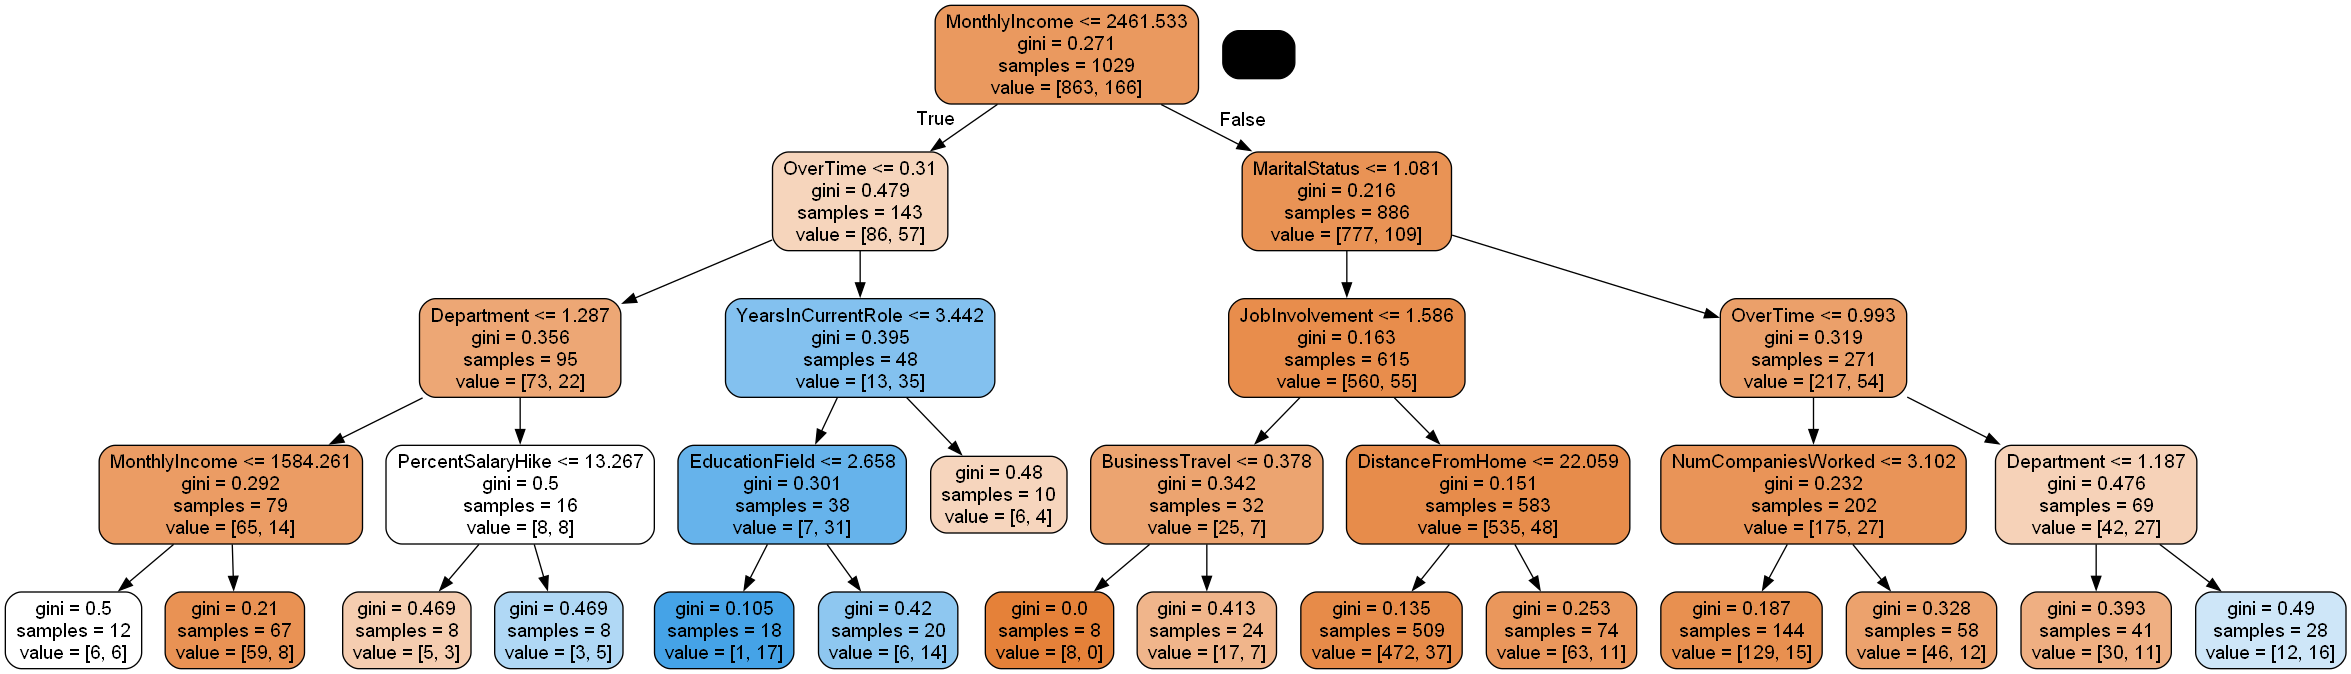

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
graph.write_pdf("dt.pdf")

True

## Reference
 - https://www.kaggle.com/code/faressayah/decision-trees-random-forest-for-beginners/notebook
 - https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
 - https://www.kaggle.com/code/shirantha/bank-marketing-data-a-decision-tree-approach